In [ ]:
# Install the necessary dependencies

import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython

---
license:
    code: MIT
    content: CC-BY-4.0
github: https://github.com/ocademy-ai/machine-learning
venue: By Ocademy
open_access: true
bibliography:
  - https://raw.githubusercontent.com/ocademy-ai/machine-learning/main/open-machine-learning-jupyter-book/references.bib
---

# Model selection

## Over-fitting and under-fitting

### Overview

Remember that the main objective of any machine learning model is to generalize the learning based on training data, so that it will be able to do predictions accurately on unknown data. Here are a few concepts: the first is 'Hypothesis', the second is 'Truth'. When we obtain data and train it, we propose a hypothesis, and the process of forcing the hypothesis to be as close to the truth as possible is our training process. This process is called 'fitting', which means the model tries to learn the patterns, relationships, or rules in the data in order to make predictions or classifications on unknown data. Due to the existence of errors in the hypothesis, we introduce the concepts of generalization error and empirical error (training error). The generalization error represents the error in unknown samples when we fit the model to the truth. It is uncertain. On the other hand, the empirical error represents the error on the training set, and it can be determined. In order to reduce the error and approach the truth, we need model evaluation. However, due to the occurrence of overfitting, a smaller error does not necessarily indicate a better model.

As you can notice the words 'Overfitting' and 'Underfitting' are kind of opposite of the term 'Generalization'. Overfitting and underfitting models don't generalize well and results in poor performance.

These are the samples of over-fitting and under-fitting in regression:

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/under_over_justalright.png
---
name: Over-fitting-regression-ms
---
Over-fitting and under-fitting in regression
:::

During the fitting process, we have an important parameter called 'bias'. It refers to the deviation of the model from the true relationship when attempting to fit the data.


### Underfitting

* Underfitting occurs when machine learning model don't fit the training data well enough. It is usually caused by simple function that cannot capture the underlying trend in the data.
* Underfitting models have high error in training as well as test set. This behavior is called as 'Low Bias'
* This usually happens when we try to fit linear function for non-linear data.
* Since underfitting models don't perform well on training set, it's very easy to detect underfitting

#### How To Avoid Underfitting?
* Increasing the model complexity. e.g. If linear function under fit then try using polynomial features
* Increase the number of features by performing the feature engineering

### Overfitting
* Overfitting occurs when machine learning model tries to fit the training data too well. It is usually caused by complicated function that creates lots of unnecessary curves and angles that are not related with data and end up capturing the noise in data.
* Overfitting models have low error in training set but high error in test set. This behavior is called as 'High Variance'

#### How To Avoid Overfitting?
* Since overfitting algorithm captures the noise in data, reducing the number of features will help. We can manually select only important features or can use model selection algorithm for same
* We can also use the 'Regularization' technique. It works well when we have lots of slightly useful features. Sklearn linear model(Ridge and LASSO) uses regularization parameter 'alpha' to control the size of the coefficients by imposing a penalty. Please refer below tutorials for more details.

### Good Fitting 
* It is a sweet spot between Underfitting and Overfitting model
* A good fitting model generalizes the learnings from training data and provide accurate predictions on new data
* To get the good fitting model, keep training and testing the model till you get the minimum train and test error. Here important parameter is 'test error' because low train error may cause overfitting so always keep an eye on test error fluctuations. The sweet spot is just before the test error start to rise.

In summary the goal of model selection is to find a model that fits the training data well and has low prediction error on new unknown data. If a model that is too simple is chosen, it may not fit the training data well, resulting in underfitting. On the other hand, if a model that is too complex is chosen, overfitting may occur, leading to a decrease in predictive performance on new data.
Now let's take a look at another example, hoping it will be helpful for your understanding.

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/classification.png
---
name: Over-fitting-classification-ms
---
Over-fitting and under-fitting in classification
:::

### A simple example of linear regression 

This is a simple graphical representation of linear regression training. 

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-datapoints.jpg
---
name: Datapoints-ms
---
Training data points 
:::

First we have some data points, then we're going to train it by linear regression.

**Over-fitting model**

| ![Over-fitting-train-ms](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-overfitting.jpg) | ![Over-fitting-test-ms]( https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-overfitting-testdata.jpg) |
|:--:|:--:|
| Over-fitting-train-ms |  Over-fitting-test-ms |

As we can see, over-fitting model fits very well on training data, but over-fitting model fits poorly on test data. 

**Under-fitting model**

| ![Under-fitting-train-ms](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-underfitting.jpg) | ![Under-fitting-test-ms]( https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-underfitting-test-data.jpg) |
|:--:|:--:|
| Under-fitting-train-ms |  Under-fitting-test-ms |

As for under-fitting model, it fits poorly on training data and test data.

**Perfect-fitting model**

After seeing the under-fitting model and the over-fitting model we are eager to know what is a good-fitting model.

| ![Perfect-fitting-train-ms](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-perfect-fit.jpg) | ![Perfect-fitting-test-ms]( https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/bias-variance-perfect-fit-test-data.jpg) |
|:--:|:--:|
| Perfect-fitting-train-ms |  Perfect-fitting-test-ms |

Perfect-fitting model fits well on training data and test data!

When over-fitting occurs, the model demonstrates high accuracy or low error on the training data but performs poorly on the testing data or new data in practical applications. In contrast, under-fitting indicates that the model is unable to capture the complex relationships or patterns within the data.

## Bias variance tradeoff

In this section we talk about Bias Variance tradeoff 

So what is Bias and Variance? Or to say why they are so importent in model selection? 

Bias refers to the model's incorrect assumptions or simplifications about the problem. When a model has high bias, it may overlook some key features or patterns in the data, resulting in systematic errors in the predictions. In other words, a high-bias model tends to produce incorrect predictions.

Variance refers to the sensitivity or volatility of the model to the training data. When a model has high variance, it is very sensitive to small perturbations in the training data and may overfit the noise and details in the training data, leading to poor generalization to new data. In other words, a high-variance model is more prone to the influence of randomness and produces larger prediction errors.

Here are some illustrations showing the relationship between bias and variance in data fitting.
:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/graphicalillustration.png
---
name: graphicalillustration-ms
---
Graphical illustration of variance and bias
:::

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/total_error.png
---
name: Model-complexity-ms
---
Model complexity v.s. error
:::


## Metrics

Were there some ways that can be used to represent the bias and variance of a model?

First, when we start training, how to evaluate the goodness of fit?

The simplest way is to output some metrics that can substitute for bias and variance. Here are several metrics that can be used for calculation:

**Accuracy**：Accuracy is a commonly used evaluation metric in classification models. It represents the proportion of correctly classified samples in the predictions made by the model. A higher accuracy indicates better performance. However, when there is class imbalance in the dataset, accuracy may underestimate the model's performance.

**Precision and Recall**：Precision and recall are primarily used to evaluate the performance of binary classification models, especially in the presence of class imbalance. Precision represents the proportion of true positive samples among those predicted as positive, while recall represents the proportion of true positive samples among all actual positive samples. Precision and recall can help provide a comprehensive evaluation of the model's classification performance.

**F1 Score**：The F1 score is the harmonic mean of precision and recall, providing a balanced assessment of a model's accuracy and recall performance. A higher F1 score indicates better performance.

**Mean Squared Error (MSE)**：MSE is a commonly used evaluation metric in regression models. It represents the average of the squared differences between predicted values and true values. A smaller MSE indicates better performance.

**Log Loss**: Log loss is commonly used in binary or multi-class probability prediction problems. It measures the difference between predicted probabilities and true labels. A lower log loss indicates better performance.

These metrics are used to evaluate the performance of models in the model selection process. However, it's important to note that these metrics only reflect the fit of the model to a particular dataset and may not fully capture its generalization performance.



### Confusion matrix

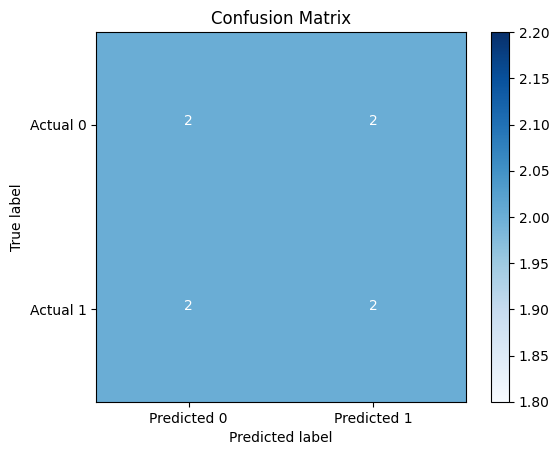

In [4]:
#This is a note of confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create actual labels and predicted labels
actual_labels = [0, 1, 0, 1, 1, 0, 0, 1]
predicted_labels = [0, 1, 1, 1, 0, 1, 0, 0]

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])

# Display counts in each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Above, we output a confusion matrix on actual_labels = [0, 1, 0, 1, 1, 0, 0, 1] and the predicted_labels = [0, 1, 1, 1, 0, 1, 0, 0]

Of course, here we are just demonstrating how to output the confusion matrix to understand its meaning after obtaining these two sets of data. In the subsequent experiment, we will explain how to obtain the desired confusion matrix through code.

There are four values in the matrix their meanings are as follows:

**True Positive (TP)**: The number of positive instances correctly predicted as positive by the model.

**False Negative (FN)**: The number of positive instances incorrectly predicted as negative by the model.

**False Positive (FP)**: The number of negative instances incorrectly predicted as positive by the model.

**True Negative (TN)**: The number of negative instances correctly predicted as negative by the model.

As for the matrix we have above, TP is where we predicted as 1 and actually it is 1. FN is the acount that we predicted as 0 but actually it is 1. FP is predicted as 1 but actually it's 0. TN is we predicted as 0 and it's actually 0.

After understanding the meaning of the matrix, we can use the following algorithms to calculate the desired metrics:

**Accuracy**: The ratio of the number of correctly predicted samples to the total number of samples.

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

**Precision**: The proportion of true positive predictions among the predicted positive instances, measuring the prediction accuracy of the model.

$$Precision = \frac{TP}{TP + FP}$$

**Recall**: The proportion of true positive predictions among the actual positive instances, measuring the model's ability to identify positives.

$$Recall = \frac{TP}{TP + FN}$$

**F1 Score**: The harmonic mean of precision and recall, considering both the accuracy and the identification ability of the model.

$$F_1 \text{ Score} = \frac{2 \cdot (Precision \cdot Recall)}{Precision + Recall}$$

When evaluating the bias of a model, we usually consider metrics such as precision, accuracy, and F1 score. A lower F1 score may indicate that the model has issues in balancing accuracy and identification ability, but it cannot be simply equated to lower bias. By considering multiple metrics and the specific requirements of the application scenario, a more comprehensive assessment of the model's performance can be achieved.


## Method 

Does a lower recall rate indicate better bias?

**No**, a lower recall rate does not indicate better bias. In machine learning, recall rate is a metric that measures the model's ability to identify positive instances. A higher recall rate indicates that the model can better identify positive instances, while a lower recall rate means that the model may miss some true positive instances.

Then does a lower F1 score indicate better bias?

**No**, a lower F1 score does not indicate better bias. The F1 score is the harmonic mean of precision and recall, which considers both the accuracy and the identification ability of the model.Bias refers to the extent to which a model makes incorrect assumptions or oversimplifies the problem, and it is related to the model's prediction accuracy. A lower bias indicates that the model can better fit the training data and is closer to the true underlying relationship.

The F1 score aims to consider both the precision and recall of the model. For certain applications, we are concerned with both the model's prediction accuracy (precision) and its ability to identify positive instances (recall). Therefore, a higher F1 score indicates that the model performs well in balancing prediction accuracy and identification ability.

All these metrics are primarily used to measure the performance of a model on a specific dataset, while model bias typically refers to the systematic deviation of the model from the trends in the dataset, which may affect the model's ability to generalize.

Then is there any way to indirectly indicate the bias of a model?

Analyzing the difference between training error and validation error, Holdout Method,Cross-Validation, and Bootstrapping are all viable approaches.

So what are these method?


### Holdout Method

Splitting the dataset into mutually exclusive training and testing sets, using the training set to train the model, and then evaluating the model's performance using the testing set. By comparing the performance on different models using the validation set, we can select the best-performing model. The sampling criteria require stratified sampling, which means dividing the data proportionally based on data types. 

However, since different partitioning methods yield different data samples, the results of model evaluation also differ. Typically, we choose a large portion of the dataset (70-80%) as the training set and the remaining portion as the testing set.
By splitting the dataset, we can observe that the testing set only represents a small portion of the total dataset, which can lead to unstable evaluation results.


### Cross-Validation

Splitting the dataset into K mutually exclusive subsets (K-fold cross-validation), using each subset as a validation set in turn and the remaining subsets as training sets to train the model and evaluate its performance. By averaging or aggregating the results from K validations, the best model can be selected.

The stability and fidelity of the results in cross-validation evaluation method largely depend on the value of K. Additionally, when the sample size is small but can be clearly separated, leave-one-out method (LOOCV) can be used.

Cross-validation provides high precision, but it can be time-consuming when dealing with large datasets.

In general, using 10-fold cross-validation is sufficient to indirectly assess the generalization ability of a model.


### Bootstrapping

Bootstrapping, also known as resampling or sampling with replacement, is a technique where each time a copy of a sample is selected from a dataset containing m samples and added to the resulting dataset. This process is repeated m times, resulting in a dataset with m samples. (Some samples may appear multiple times in the resulting dataset.) This resulting dataset is then used as the training set.

Since the sampling is conducted independently, the probability that a specific sample is never selected in m iterations of sampling is $ [(1-\frac{1}{m})^m] $. As m approaches infinity, $ lim_{m \to \infty} (1 - \frac{1}{m})^m = \frac{1}{e} $ the limit of this probability is $1/e$ , where e is the base of the natural logarithm and approximately equal to 2.71828. Therefore, when m is sufficiently large, the probability that a specific sample is never selected in m iterations of sampling is close to $\frac{1}{e} ≈ 0.36787944117$ .


## Interpreting the Learning Curves

You might think about the information in the training data as being of two kinds: *signal* and *noise*. The signal is the part that generalizes, the part that can help our model make predictions from new data. The noise is that part that is *only* true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions. The noise is the part might look useful but really isn't.

We train a model by choosing weights or parameters that minimize the loss on a training set. You might know, however, that to accurately assess a model's performance, we need to evaluate it on a new set of data, the *validation* data. 

When we train a model we've been plotting the loss on the training set epoch by epoch. To this we'll add a plot the validation data too. These plots we call the **learning curves**. To train deep learning models effectively, we need to be able to interpret them.

Now, the training loss will go down either when the model learns signal or when it learns noise. But the validation loss will go down only when the model learns signal. (Whatever noise the model learned from the training set won't generalize to new data.) So, when a model learns signal both curves go down, but when it learns noise a *gap* is created in the curves. The size of the gap tells you how much noise the model has learned.

Ideally, we would create models that learn all of the signal and none of the noise. This will practically never happen. Instead we make a trade. We can get the model to learn more signal at the cost of learning more noise. So long as the trade is in our favor, the validation loss will continue to decrease. After a certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise.

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. Underfitting the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*. Overfitting the training set is when the loss is not as low as it could be because the model learned too much *noise*. The trick to training deep learning models is finding the best balance between the two.

We'll look at a couple ways of getting more signal out of the training data while reducing the amount of noise later.


Let's first take a look at a learning curve. In this part we're using a datasets called iris in scikit-learn.

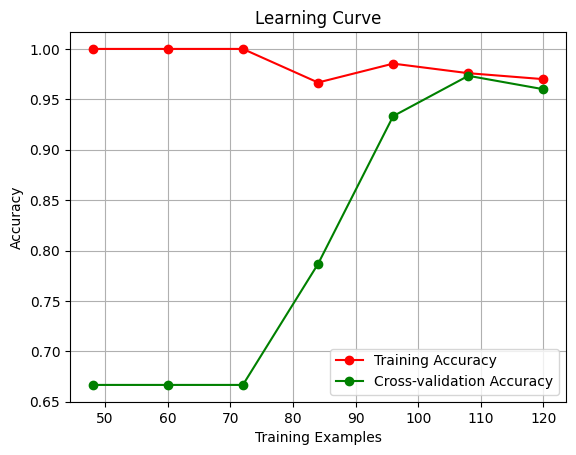

In [1]:
#This is a note of a learning curve by using the iris dataset in sklearn

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a logistic regression model
model = LogisticRegression()

# Define the range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curve data using the learning_curve function
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

# Calculate the average accuracy for the training and test sets
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the accuracy curves for the training and test sets
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Accuracy")
plt.legend(loc="best")

plt.show()

First of all, let's take a look at a plot, this is a simple learning curve using an iris dataset in sklearn.dataset. We can simply notice the two curve we plot fells far apart when we have less examples, and when we enlarge the training examples we can see the two lines are approaching convergence.

Why? 

To train a model, it is necessary to have a sufficient number of samples so that it can generalize patterns from the data. Assuming we have a function y=f(x), essentially, machine learning algorithms summarize and fit the f function based on a large number of (x, y) pairs. Therefore, if you have too few (x, y) pairs, the algorithm will not be able to summarize the function effectively. This is the impact of the sample size on the degree of fitting.

## Capacity

A model's **capacity** refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity.

You can increase the capacity of a network either by making it *wider* (more units to existing layers) or by making it *deeper* (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.

You'll explore how the capacity of a network can affect its performance in the exercise.

Determining an appropriate model capacity is a crucial task in model selection. Here are some common methods and guidelines to help determine the right model capacity:

**Rule of thumb**: In general, if the dataset is small or the task is relatively simple, choosing a lower-capacity model may be more suitable to avoid overfitting. For larger datasets or complex tasks, a higher-capacity model may be able to better fit the data.

**Cross-validation**: This method has been mentioned earlier in the previous text, and it is an extremely important approach in model selection. Therefore, it is necessary to mention this method multiple times and gain a deeper understanding of it.

**Learning curves**: Learning curves can help determine if the model capacity is appropriate. By plotting the performance of the model on the training set and the validation set as the number of training samples increases, one can observe the model's fitting and generalization abilities. If the model performs poorly on both the training set and the validation set, it may be underfitting due to low capacity. If the model performs well on the training set but poorly on the validation set, it may be overfitting due to high capacity. Adjustments to the model capacity can be made based on the trend of the learning curve.

**Regularization**: Adjusting the model capacity through regularization techniques (which we will also mention in the text later). Increasing the regularization parameter can reduce model capacity and decrease the risk of overfitting. Decreasing the regularization parameter can increase model capacity and improve fitting ability. By evaluating the model performance on the validation set with different regularization parameters, an appropriate regularization parameter value can be chosen.

**Model comparison experiments**: Train and evaluate models with different capacities and compare their performance on the validation set. By comparing the generalization performance of different-capacity models, select the model capacity with the best performance.

Considering the above methods and guidelines, selecting an appropriate model capacity requires a balance between theory and practice and decision-making based on the specific problem and available resources. The ultimate goal is to choose a model that performs well on both the training data and new data, achieving good generalization ability.

## L1 and L2 Regularization

You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the 'simplest' one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simple models are less likely to overfit than complex ones.

A 'simple model' in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parmeters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weeights only to  take small values, which makes the distribution of weight values more 'regular'. This is called 'weight regularization', and it is done by adding to the loss function of the network a cost associated with having large weights. 

Let's consider a target function with a regularization term, which can be represented as:

$$J(\theta) = L(\theta) + \lambda R(\theta)$$

Here, $J(\theta)$ is the target function, $\theta$ represents the model's parameters, $L(\theta)$ is the loss function (typically the model's error on the training data), $R(\theta)$ is the regularization term, and \lambda is the regularization parameter.

The loss function $L(\theta)$ measures how well the model fits the training data, and our goal is to minimize it. The regularization term $R(\theta)$ constrains or penalizes the values of the model's parameters, and it controls the complexity of the model.

The regularization parameter $\lambda$ determines the weight of the regularization term in the target function. When $\lambda$ approaches $\theta$, the impact of the regularization term becomes negligible, and the model's objective is primarily to minimize the loss function. On the other hand, when $\lambda$ approaches infinity, the regularization term's impact becomes significant, and the model's objective is to minimize the regularization term as much as possible, leading to parameter values tending towards zero.

There are two forms of this cost: L1 regularization (also known as Lasso regression) with the regularization term $R(\theta)$ represented as the sum of the absolute values of the parameters $\theta$: $R(\theta) = ||\theta||_1$. L1 regularization can induce certain parameters of the model to become zero, thereby achieving feature selection and sparsity.

L2 regularization (also known as Ridge regression) with the regularization term $R(\theta)$ represented as the square root of the sum of the squares of the parameters $\theta$: $R(\theta) = ||\theta||_2$. L2 regularization encourages the parameter values of the model to gradually approach zero but not exactly become zero, hence it does not possess the ability for feature selection.

In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

$$L2\ Loss = Loss + \textcolor{red}{\lambda}\sum_{i} w_i^2$$

$$L1\ Loss = Loss + \textcolor{red}{\lambda}\sum_{i} \lvert w \rvert$$



:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/circlesquare.png
---
name: circlesquare-ms
---
L1 and L2 regularization
:::

Both are very common regularization techniques, but they are suitable for different scenarios. L1 regularization is suitable for situations that require feature selection or demand model interpretability. On the other hand, L2 regularization is more general and applicable in most cases to prevent overfitting and improve model generalization ability.


## Early Stopping

We mentioned that when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called **early stopping**.

Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal. So besides preventing overfitting from training too long, early stopping can also prevent *underfitting* from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.

## Adding Early Stopping

In Keras, we include early stopping in our training through a callback. A **callback** is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. (Keras has [a variety of useful callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) pre-defined, but you can [define your own](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback), too.)

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/traintestoverfitting.png
---
name: EarlyStopping-ms
---
Early stopping
:::


## The impact of the value of $\lambda$ 

We notice that the objective function contains not only the regularization term but also the regularization parameter $\lambda$.

The selection of the regularization parameter is an important part of regularization, and it needs to be fine-tuned during the model training process.

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/lagrange-animation.gif
---
name: impact-of-lambda-ms
---
The impact of the value of $\lambda$  
:::

The value of $\lambda$ has a significant impact on weight regularization.

When $\lambda$ is small, the effect of weight regularization is relatively minor. The network is more likely to learn complex patterns and structures, which can lead to overfitting. This means that the model may perform well on the training data but have poor generalization on new data.

When $\lambda$ is large, the effect of weight regularization becomes more pronounced. The network is constrained to simpler patterns and structures, reducing the risk of overfitting. This can improve the model's generalization on new data but may result in a slight decrease in performance on the training data.

Choosing the appropriate value of $\lambda$ requires adjustment and optimization based on the specific problem and dataset. Typically, cross-validation or other evaluation methods can be used to select the optimal $\lambda$ value, finding a balance between model complexity and generalization ability.

When using regularization during model training, its effect can be better understood. Let's take the example of linear regression.

Suppose we have a dataset containing house area and prices, and we want to use a linear regression model to predict house prices. We can define a linear regression model that includes an intercept term and a coefficient for the house area.

Without regularization, the objective of the model is to minimize the mean squared error (MSE) on the training data. This means the model will try to find the best-fitting line in the training data to minimize the differences between the predicted values and the actual values.

However, if the training data contains noise or outliers, or if the training set is relatively small, the model may overfit the data, leading to a decrease in prediction performance on new data. In such cases, regularization can help control the complexity of the model and reduce the risk of overfitting.

By adding L2 regularization (Ridge regularization) to the linear regression model, we introduce the square of the L2 norm of the parameters as a penalty term in the loss function. This encourages the model to prefer smaller parameter values during training, preventing the parameters from becoming too large.

The effect of regularization is achieved by balancing the trade-off between minimizing the training error and minimizing the penalty term. A larger regularization parameter will penalize larger parameter values more strongly, making the model smoother and reducing the differences between parameters. This helps reduce the risk of overfitting and improves the model's generalization ability on new data.

In summary, the role of regularization in linear regression models is to control the complexity of the model, reduce the risk of overfitting, and improve the model's generalization ability on new data.

In this section, we primarily utilize learning curves to optimize the regularization parameter, also known as the learning curve.


## Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural network, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; aafter applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The 'dropout rate' is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In tf.keras you can introduce a dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/dropoutgif.gif
---
name: Dropout-ms
---
Dropout 
:::



### Prediction after dropout

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/kUc8r.jpg
---
name: Prediction-after-dropout-ms
---
Prediction after dropout 
:::



During training, p neuron activations (usually, p=0.5, so 50%) are dropped. Doing this at the testing stage is not our goal (the goal is to achieve a better generalization). From the other hand, keeping all activations will lead to an input that is unexpected to the network, more precisely, too high (50% higher) input activations for the following layer 

Consider the neurons at the output layer. During training, each neuron usually get activations only from two neurons from the hidden layer (while being connected to four), due to dropout. Now, imagine we finished the training and remove dropout. Now activations of the output neurons will be computed based on four values from the hidden layer. This is likely to put the output neurons in unusual regime, so they will produce too large absolute values, being overexcited 

To avoid this, the trick is to multiply the input connections' weights of the last layer by 1-p (so, by 0.5). Alternatively, one can multiply the outputs of the hidden layer by 1-p, which is basically the same 

## Conclusions


:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/ZahidHasan.png
---
name: Training-size-matters-ms
---
Training size matters
:::


:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/steps.png
---
name: Steps-ms
---
How to choose a good model
:::

The above image illustrates well why we consider bias as an important aspect in model selection and even in machine learning. When our model understands the signal, its improvement is positive. However, once the model starts to understand the noise, the bias of the model starts to increase. This is where cross-validation, mentioned earlier, comes into play.

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/model-selection/Bias-vs.webp
---
name: Conclusion-ms
---
Conclusion 
:::

The purpose of model selection is to choose the best model among multiple candidate models for a given machine learning problem. The best model refers to the one that performs well on the training data and has good generalization ability to unseen new data.

The importance of model selection lies in the fact that different models may have different adaptability to the nature of the data and the complexity of the problem. Selecting an appropriate model can improve the model's prediction accuracy, robustness, and interpretability.

## Your turn! 🚀

Machine learning model selection and dealing with overfitting and underfitting are crucial aspects of the machine learning pipeline. In this assignment, you'll have the opportunity to apply your understanding of these concepts and techniques. Please complete the following tasks:
[assignment](../assignments/ml-advanced/model-selection/model-selection-assignment-1)

## Self study

Here are some recommended open-source and free model selection projects on GitHub, you can refer to them for further study:

- [An automated machine learning tool(AutoML), by aron-bram](https://github.com/automl/auto-sklearn)

- [An open platform ModelHub, by 9zelle9](https://github.com/modelhub-ai/modelhub)


## Acknowledgments

Thanks to xyb for organizing the content related to model selection and for their suggestion to concretize abstract concepts.
